In [127]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from warnings import filterwarnings
filterwarnings('ignore')


In [128]:
df= pd.read_csv("C:/Nithin Learning/Data sets/bank.csv")

In [129]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


df.info()

# EDA

In [130]:
#Target variable deposit indicates if the customer enrolled or not.

df['deposit'].value_counts()

no     5873
yes    5289
Name: deposit, dtype: int64

In [131]:
#Encoding the target variable
df['deposit'] = df['deposit'].apply(lambda x : 0 if x =='no' else 1) 

In [132]:
df['deposit'].value_counts()

0    5873
1    5289
Name: deposit, dtype: int64

In [133]:
#Age 

df['age'].describe()

count    11162.000000
mean        41.231948
std         11.913369
min         18.000000
25%         32.000000
50%         39.000000
75%         49.000000
max         95.000000
Name: age, dtype: float64

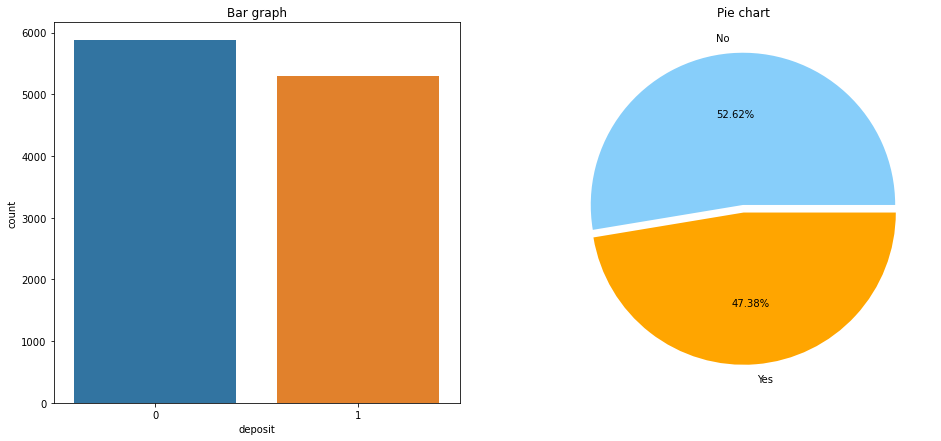

In [134]:
#There is lighter imbalance in the target variable

plt.figure(figsize=(16,7))

plt.subplot(1,2,1)
sns.countplot(df['deposit'])
plt.title('Bar graph')

plt.subplot(1,2,2)
plt.pie(df['deposit'].value_counts(),explode=[0.05,0], colors=[ 'lightskyblue', 'orange'], labels=['No', 'Yes'], autopct='%.2f%%')
plt.title('Pie chart')

plt.show()

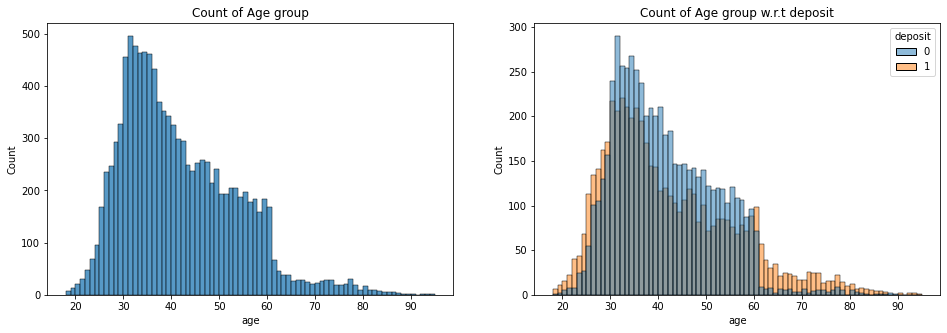

In [135]:
#Age is almost normally distributed and the the 'yes'/'No' ratio for the this remains the same

plt.figure(figsize=(16,5))

plt.subplot(1,2,1)
sns.histplot(df['age'], binwidth=1)
plt.title('Count of Age group')

plt.subplot(1,2,2)
sns.histplot(data=df, x='age', hue='deposit', binwidth=1)
plt.title('Count of Age group w.r.t deposit')
plt.show()

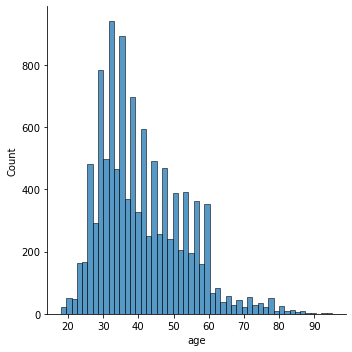

In [136]:
sns.displot(df['age'])

In [137]:
df['job'].value_counts()

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64

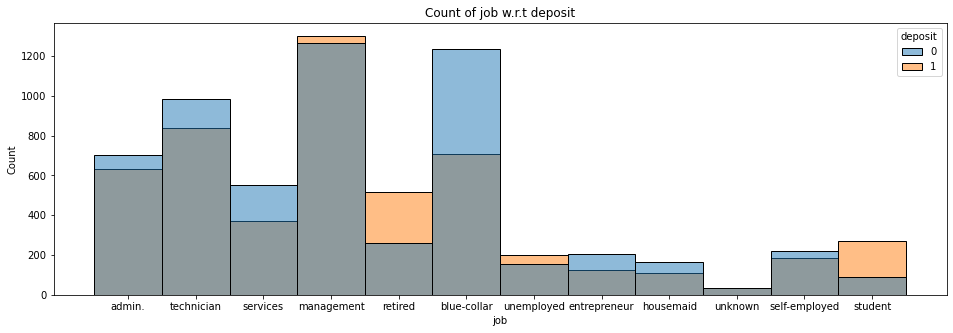

In [138]:
# unemployed/student/retired people tend to go with the deposit.

plt.figure(figsize=(16,5))

sns.histplot(data=df, x='job', hue='deposit', binwidth=1)
plt.title('Count of job w.r.t deposit')
plt.show()

In [139]:
df['education'].value_counts()

secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: education, dtype: int64

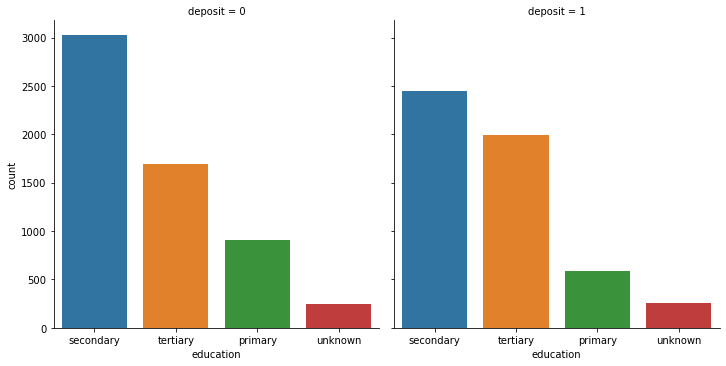

In [140]:
#Eduction

sns.factorplot('education', data = df, kind = 'count', col = 'deposit', aspect = 1)
plt.show()

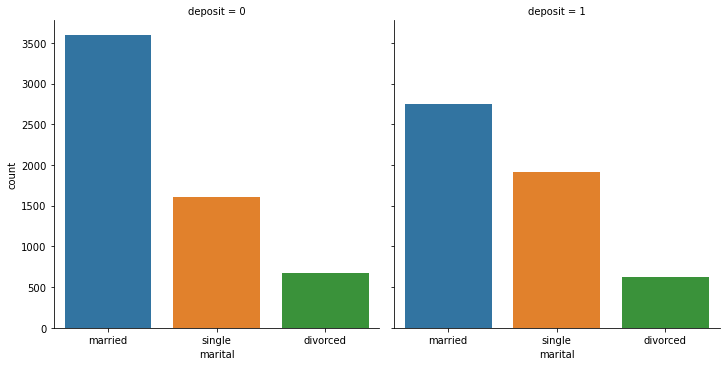

In [141]:
#Married people are more so they tend to go or not with the deposit equally

sns.factorplot('marital', data = df, kind = 'count', col = 'deposit', aspect = 1)
plt.show()

In [142]:
pd.crosstab(df['marital'], df['deposit'])

deposit,0,1
marital,,
divorced,671,622
married,3596,2755
single,1606,1912


In [143]:
df.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,1
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,1
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,1


In [144]:
#People having default for credit card .
pd.crosstab(df['default'], df['deposit'])

deposit,0,1
default,,
no,5757,5237
yes,116,52


In [145]:
df['balance'].isnull().sum()

0

In [146]:
#people having own house

pd.crosstab(df['housing'], df['deposit'])

deposit,0,1
housing,,
no,2527,3354
yes,3346,1935


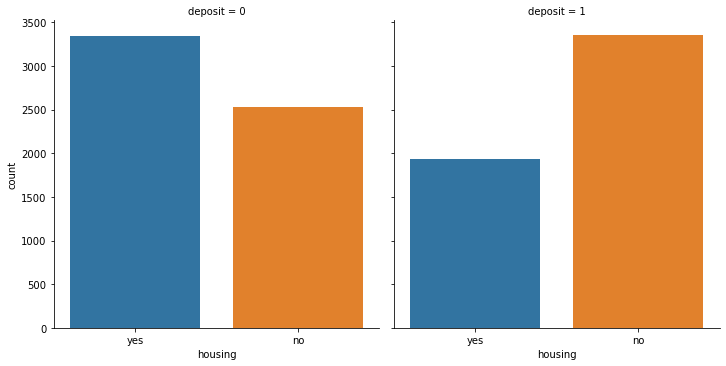

In [147]:
sns.factorplot('housing', data = df, kind = 'count', col = 'deposit', aspect = 1)
plt.show()

Text(0.5, 1.0, 'Pie chart')

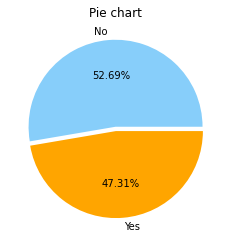

In [148]:
plt.pie(df['housing'].value_counts(),explode=[0.05,0], colors=[ 'lightskyblue', 'orange'], labels=['No', 'Yes'], autopct='%.2f%%')
plt.title('Pie chart')

In [149]:
pd.crosstab(df['loan'], df['deposit'])

deposit,0,1
loan,,
no,4897,4805
yes,976,484


In [150]:
df['loan'].value_counts()

no     9702
yes    1460
Name: loan, dtype: int64

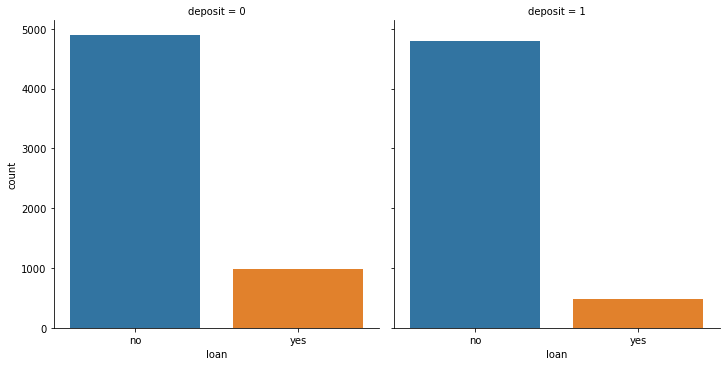

In [151]:
sns.factorplot('loan', data = df, kind = 'count', col = 'deposit', aspect = 1)
plt.show()

In [153]:


#we can perform a statiscal test to find out whether there is a relationship b/w target and major subject

#Chi2 contingency
# Ho : There is no relation
# Ha : There is a relation

obs = pd.crosstab(df['loan'], df['deposit'])

tstat, pvalue, x, exp = stats.chi2_contingency(obs)

print(pvalue)

# pval = 0.0022
# pval < sig lvl
# Ho is rejected
# There is a relation

#we  remove that feature

2.171286879630289e-31


In [154]:
df['contact'].value_counts()

cellular     8042
unknown      2346
telephone     774
Name: contact, dtype: int64

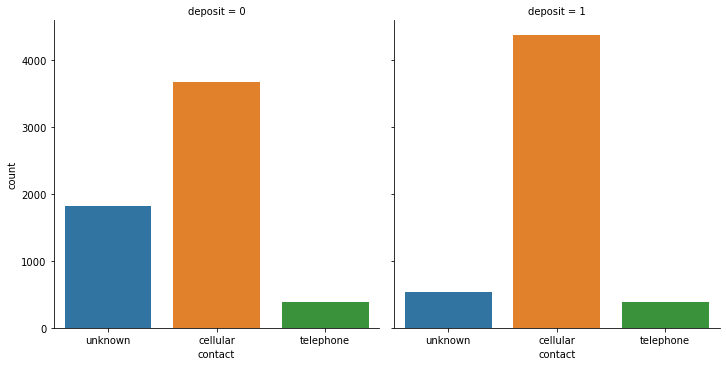

In [155]:
sns.factorplot('contact', data = df, kind = 'count', col = 'deposit', aspect = 1)
plt.show()

In [156]:
df['day'].value_counts()

20    570
18    548
30    478
5     477
15    466
14    463
13    453
21    452
6     447
12    445
8     419
17    411
28    410
4     402
29    388
19    384
7     382
11    373
16    369
9     364
2     334
3     306
27    284
22    269
26    252
23    245
25    224
10    163
31    140
24    122
1     122
Name: day, dtype: int64

In [157]:
df['month'].value_counts()

may    2824
aug    1519
jul    1514
jun    1222
nov     943
apr     923
feb     776
oct     392
jan     344
sep     319
mar     276
dec     110
Name: month, dtype: int64

In [158]:
df['campaign'].value_counts()

1     4798
2     3028
3     1321
4      771
5      378
6      265
7      139
8      128
9       72
10      52
11      40
13      30
12      29
14      15
17      14
15      13
16       9
18       8
21       8
24       5
19       5
20       5
30       4
22       4
26       3
23       3
25       3
43       2
29       2
32       2
63       1
33       1
41       1
31       1
28       1
27       1
Name: campaign, dtype: int64

In [159]:
df.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,1
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,1
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,1


In [160]:
df['pdays'].value_counts()

-1      8324
 92      106
 182      89
 91       84
 181      81
        ... 
 587       1
 579       1
 515       1
 491       1
 683       1
Name: pdays, Length: 472, dtype: int64

<AxesSubplot:xlabel='pdays'>

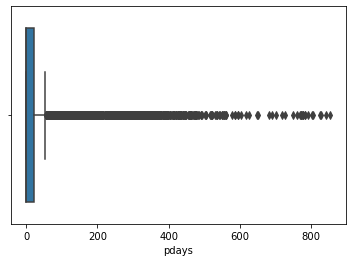

In [161]:
sns.boxplot(df['pdays'])

In [162]:
df['poutcome'].value_counts()

unknown    8326
failure    1228
success    1071
other       537
Name: poutcome, dtype: int64

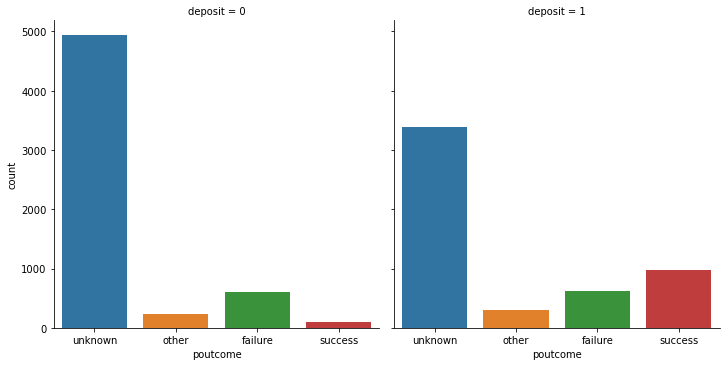

In [163]:
sns.factorplot('poutcome', data = df, kind = 'count', col = 'deposit', aspect = 1)
plt.show()

In [164]:
df['previous'].describe()

count    11162.000000
mean         0.832557
std          2.292007
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         58.000000
Name: previous, dtype: float64

In [165]:
df['previous'].value_counts()

0     8324
1      887
2      693
3      435
4      244
5      165
6      117
7       77
8       60
9       34
10      30
11      23
12      16
17      11
13      11
14       6
15       5
19       4
16       2
27       2
23       2
20       2
58       1
26       1
18       1
28       1
41       1
21       1
29       1
37       1
40       1
22       1
30       1
55       1
Name: previous, dtype: int64

# PRE PROCESSING

In [166]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,1
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,1
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,1
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,1
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,1


In [167]:
#drop column duration as we only know the duration of how much one will speak after the phone is received.

df.drop('duration', axis=1, inplace=True)

In [63]:
#drop column pdays has it has a mean of 0 and and many outliers

df.drop('pdays', axis=1, inplace=True)

In [168]:
df.drop('loan', axis=1, inplace=True)

In [169]:
cat_list = list(df.select_dtypes(exclude='number').columns)

In [170]:
cat_list

['job',
 'marital',
 'education',
 'default',
 'housing',
 'contact',
 'month',
 'poutcome']

In [171]:
num_list= df.select_dtypes(include='number').columns

In [172]:
num_list

Index(['age', 'balance', 'day', 'campaign', 'pdays', 'previous', 'deposit'], dtype='object')

In [173]:
num_list = ['age', 'balance', 'day', 'campaign', 'previous']

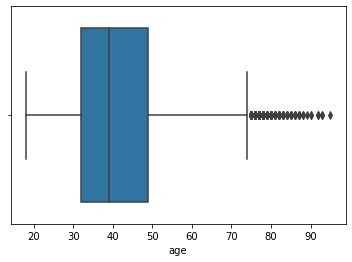

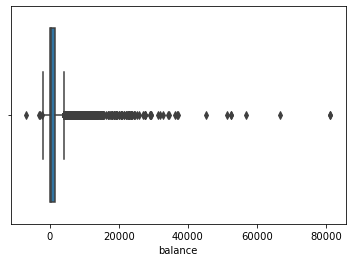

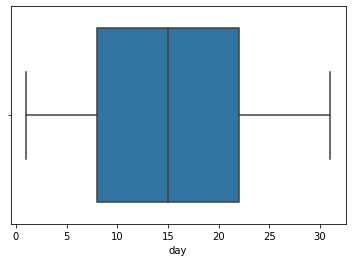

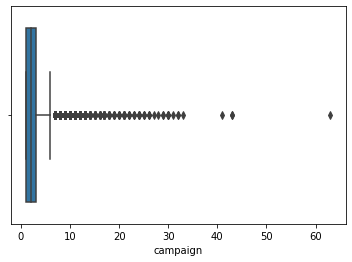

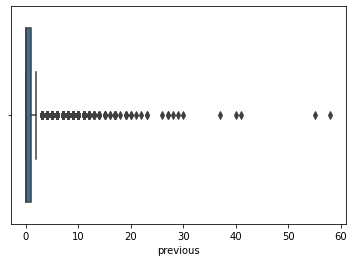

In [174]:

for feat in num_list:
    sns.boxplot(df[feat])
    plt.show()

In [175]:
df.head()

,age,job,marital,education,default,balance,housing,contact,day,month,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,unknown,5,may,1,-1,0,unknown,1
1,56,admin.,married,secondary,no,45,no,unknown,5,may,1,-1,0,unknown,1
2,41,technician,married,secondary,no,1270,yes,unknown,5,may,1,-1,0,unknown,1
3,55,services,married,secondary,no,2476,yes,unknown,5,may,1,-1,0,unknown,1
4,54,admin.,married,tertiary,no,184,no,unknown,5,may,2,-1,0,unknown,1


In [176]:
#Power transformation to reduce outliers

from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()

In [177]:
df[num_list] = pt.fit_transform(df[num_list])

In [178]:
df_final = pd.get_dummies(df, columns=cat_list, drop_first=True)

In [179]:
df_final['balance'].describe()

count    1.116200e+04
mean    -3.803324e-16
std      1.000045e+00
min     -2.817270e+01
25%     -4.191869e-01
50%     -2.295041e-01
75%      1.898823e-01
max      1.689828e+01
Name: balance, dtype: float64

In [180]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 41 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  11162 non-null  float64
 1   balance              11162 non-null  float64
 2   day                  11162 non-null  float64
 3   campaign             11162 non-null  float64
 4   pdays                11162 non-null  int64  
 5   previous             11162 non-null  float64
 6   deposit              11162 non-null  int64  
 7   job_blue-collar      11162 non-null  uint8  
 8   job_entrepreneur     11162 non-null  uint8  
 9   job_housemaid        11162 non-null  uint8  
 10  job_management       11162 non-null  uint8  
 11  job_retired          11162 non-null  uint8  
 12  job_self-employed    11162 non-null  uint8  
 13  job_services         11162 non-null  uint8  
 14  job_student          11162 non-null  uint8  
 15  job_technician       11162 non-null 

In [181]:
# split

y = df_final['deposit']
X = df_final.drop('deposit', axis=1)

In [182]:
#test, train
from sklearn.model_selection import train_test_split

In [183]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

# MODEL BUILDING

In [184]:
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, confusion_matrix, precision_score, recall_score, f1_score

In [185]:
def model_eval(algo, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test):
    algo.fit(X_train, y_train)
    
    y_train_pred = algo.predict(X_train)
    y_train_pred_proba = algo.predict_proba(X_train)[:, 1]

    cm = confusion_matrix(y_train, y_train_pred)
    print('Train dataset :\n')
    print('Confusion matrix:\n', cm)
    print('Accuracy :', accuracy_score(y_train, y_train_pred))
    print('Precision :',precision_score(y_train, y_train_pred))
    print('Recall :', recall_score(y_train, y_train_pred))
    print('AUC score :', roc_auc_score(y_train, y_train_pred_proba))
    print('F1 score :', f1_score(y_train, y_train_pred))
    
    fpr_train, tpr_train, threshold_train = roc_curve(y_train, y_train_pred_proba)

    plt.plot(fpr_train,fpr_train)
    plt.plot(fpr_train,tpr_train)
    plt.show()
    
    
    y_test_pred = algo.predict(X_test)
    y_test_pred_proba = algo.predict_proba(X_test)[:, 1]

    cm = confusion_matrix(y_test, y_test_pred)
    print('\n\nTest dataset :\n')
    print('Confusion matrix:\n', cm)
    print('Accuracy :', accuracy_score(y_test, y_test_pred))
    print('Precision :',precision_score(y_test, y_test_pred))
    print('Recall :', recall_score(y_test, y_test_pred))
    print('AUC score :', roc_auc_score(y_test, y_test_pred_proba))
    print('F1 score :', f1_score(y_test, y_test_pred))
    
    fpr_test, tpr_test, threshold_test = roc_curve(y_test, y_test_pred_proba)

    plt.plot(fpr_test,fpr_test)
    plt.plot(fpr_test,tpr_test)
    plt.show()

# LOGISTIC REGRESSION

In [186]:
from sklearn.linear_model import LogisticRegression


Train dataset :

Confusion matrix:
 [[3411  720]
 [1588 2094]]
Accuracy : 0.7045949059260207
Precision : 0.744136460554371
Recall : 0.5687126561651277
AUC score : 0.7581552078184699
F1 score : 0.6447044334975369


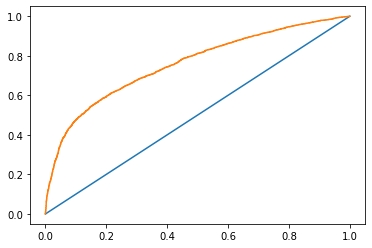



Test dataset :

Confusion matrix:
 [[1464  278]
 [ 676  931]]
Accuracy : 0.7151388474171394
Precision : 0.7700578990901572
Recall : 0.5793403858120721
AUC score : 0.7684856079565792
F1 score : 0.6612215909090909


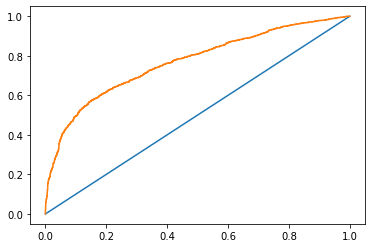

In [187]:
lor = LogisticRegression()

model_eval(lor)

In [188]:
y.value_counts()

0    5873
1    5289
Name: deposit, dtype: int64

# FEATURE SELECTION

In [189]:
from sklearn.feature_selection import RFECV

In [190]:
lor = LogisticRegression()

feat_sel = RFECV(lor, cv=3, scoring='roc_auc', n_jobs=-1)
feat_sel.fit(X,y)

RFECV(cv=3, estimator=LogisticRegression(), n_jobs=-1, scoring='roc_auc')

In [191]:
feat_sel.n_features_

40

In [192]:
rfe_df = pd.DataFrame(feat_sel.ranking_, index=X.columns, columns=['rank'])

In [193]:
selected = list(rfe_df[rfe_df['rank'] == 1].index)

In [195]:
X_train_sel = X_train[selected]
X_test_sel = X_test[selected]

Train dataset :

Confusion matrix:
 [[3411  720]
 [1588 2094]]
Accuracy : 0.7045949059260207
Precision : 0.744136460554371
Recall : 0.5687126561651277
AUC score : 0.7581552078184699
F1 score : 0.6447044334975369


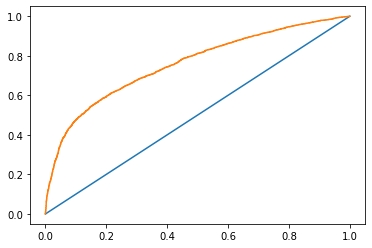



Test dataset :

Confusion matrix:
 [[1464  278]
 [ 676  931]]
Accuracy : 0.7151388474171394
Precision : 0.7700578990901572
Recall : 0.5793403858120721
AUC score : 0.7684856079565792
F1 score : 0.6612215909090909


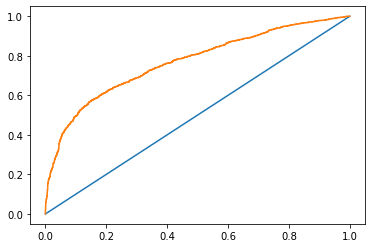

In [196]:
lor = LogisticRegression()

model_eval(lor, X_train_sel, X_test_sel, y_train, y_test)

# DECISION TREE

In [197]:
from sklearn.tree import DecisionTreeClassifier

Train dataset :

Confusion matrix:
 [[4131    0]
 [   0 3682]]
Accuracy : 1.0
Precision : 1.0
Recall : 1.0
AUC score : 1.0
F1 score : 1.0


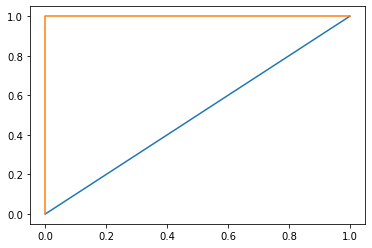



Test dataset :

Confusion matrix:
 [[1179  563]
 [ 610  997]]
Accuracy : 0.649746192893401
Precision : 0.639102564102564
Recall : 0.6204107031736155
AUC score : 0.6486094847670603
F1 score : 0.6296179349542154


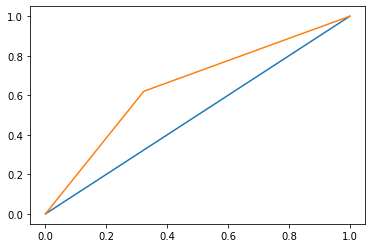

In [198]:
dtc = DecisionTreeClassifier(random_state=42)

model_eval(dtc)

In [199]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [200]:
# hyperparameter tuning

params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [5,6,7,8,9,10,11,12,13,14,15],
    'min_samples_split' : np.arange(2,15)
}

In [201]:
dtc = DecisionTreeClassifier()

g_search = GridSearchCV(dtc, param_grid=params, scoring='roc_auc', n_jobs=-1, cv=3, verbose=3)
g_search.fit(X,y)

Fitting 3 folds for each of 286 candidates, totalling 858 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 416 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 858 out of 858 | elapsed:   13.0s finished


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
                         'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])},
             scoring='roc_auc', verbose=3)

In [202]:
g_search.best_params_

{'criterion': 'gini', 'max_depth': 8, 'min_samples_split': 13}

Train dataset :

Confusion matrix:
 [[3619  512]
 [1603 2079]]
Accuracy : 0.7292973249712018
Precision : 0.8023928984947897
Recall : 0.564638783269962
AUC score : 0.7831447182449941
F1 score : 0.6628407460545194


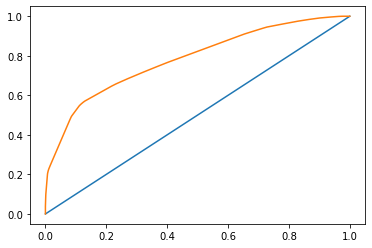



Test dataset :

Confusion matrix:
 [[1503  239]
 [ 743  864]]
Accuracy : 0.7067781427291729
Precision : 0.7833182230281052
Recall : 0.537647790914748
AUC score : 0.7583496642487624
F1 score : 0.6376383763837639


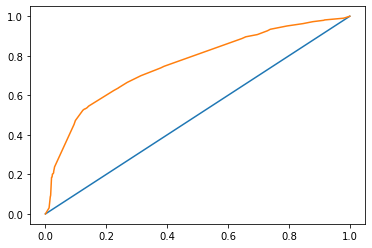

In [203]:
dtc = DecisionTreeClassifier(**g_search.best_params_, random_state=42)

model_eval(dtc)

In [204]:
#RandomizedSearchCV

from scipy.stats import randint as sp_randint

In [205]:
params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : sp_randint(2,10),
    'min_samples_split' : sp_randint(2,12)
}

In [206]:
dtc= DecisionTreeClassifier()
r_search = RandomizedSearchCV(dtc, param_distributions=params, n_iter=100, scoring='roc_auc', n_jobs=-1, cv=3, verbose=3, random_state=42)
r_search.fit(X,y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    2.2s finished


RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001DB106FC130>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001DB1067FC70>},
                   random_state=42, scoring='roc_auc', verbose=3)

In [207]:
r_search.best_params_

{'criterion': 'gini', 'max_depth': 7, 'min_samples_split': 9}

Train dataset :

Confusion matrix:
 [[3561  570]
 [1670 2012]]
Accuracy : 0.71329834890567
Precision : 0.7792408985282726
Recall : 0.5464421510048887
AUC score : 0.7644997725889399
F1 score : 0.6424010217113666


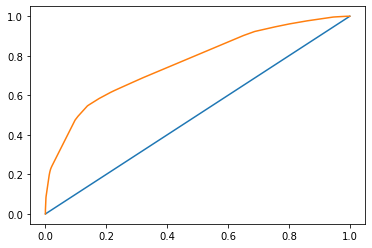



Test dataset :

Confusion matrix:
 [[1474  268]
 [ 747  860]]
Accuracy : 0.6969244550612123
Precision : 0.7624113475177305
Recall : 0.5351586807716241
AUC score : 0.745491881457201
F1 score : 0.6288848263254112


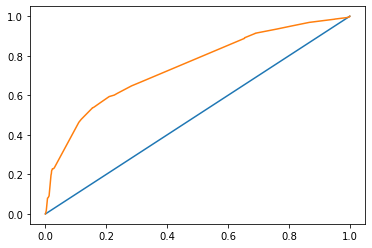

In [208]:
dtc = DecisionTreeClassifier(**r_search.best_params_, random_state=42)

model_eval(dtc)

In [209]:
from sklearn.ensemble import RandomForestClassifier

Train dataset :

Confusion matrix:
 [[4131    0]
 [   0 3682]]
Accuracy : 1.0
Precision : 1.0
Recall : 1.0
AUC score : 1.0
F1 score : 1.0


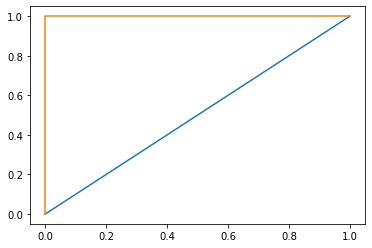



Test dataset :

Confusion matrix:
 [[1418  324]
 [ 589 1018]]
Accuracy : 0.7273813078530905
Precision : 0.7585692995529061
Recall : 0.6334785314250155
AUC score : 0.7805051736197192
F1 score : 0.6904035266191929


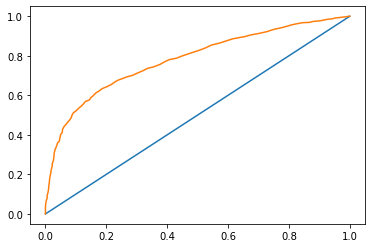

In [210]:
rfc = RandomForestClassifier(random_state=42)

model_eval(rfc)

In [108]:
#hyparameter tuning

params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : sp_randint(2,20),
    'min_samples_split' : sp_randint(2,25),
    'n_estimators' : sp_randint(100,200)
}

rfc = RandomForestClassifier()

In [113]:
r_search = RandomizedSearchCV(rfc, param_distributions=params, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=3, random_state=42)
r_search.fit(X,y)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001DB09A66430>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001DB07906460>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001DB07A1B100>},
                   random_state=42, scoring='roc_auc')

In [112]:
r_search.best_params_

{'criterion': 'entropy',
 'max_depth': 16,
 'min_samples_split': 20,
 'n_estimators': 154}

Train dataset :

Confusion matrix:
 [[3745  386]
 [1053 2629]]
Accuracy : 0.8158197875335979
Precision : 0.8719734660033167
Recall : 0.7140141227593699
AUC score : 0.9211163036307797
F1 score : 0.7851276691055696


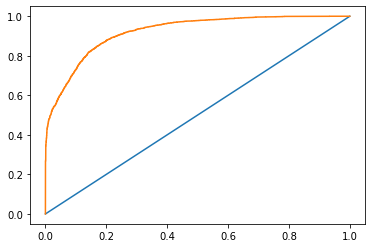



Test dataset :

Confusion matrix:
 [[1493  249]
 [ 650  957]]
Accuracy : 0.7315616601970738
Precision : 0.7935323383084577
Recall : 0.5955196017423771
AUC score : 0.7959983482139348
F1 score : 0.6804123711340206


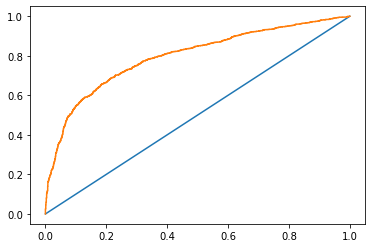

In [114]:
rfc = RandomForestClassifier(**r_search.best_params_, random_state=42)
model_eval(rfc)

# KNN

In [115]:
from sklearn.neighbors import KNeighborsClassifier

Train dataset :

Confusion matrix:
 [[3474  657]
 [1015 2667]]
Accuracy : 0.7859976961474465
Precision : 0.8023465703971119
Recall : 0.7243346007604563
AUC score : 0.8631682311942755
F1 score : 0.7613474165001428


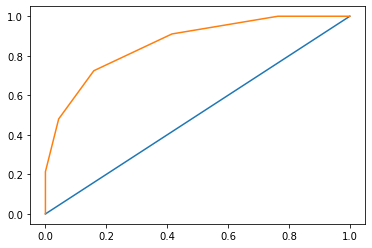



Test dataset :

Confusion matrix:
 [[1334  408]
 [ 651  956]]
Accuracy : 0.6837862048372648
Precision : 0.7008797653958945
Recall : 0.5948973242065961
AUC score : 0.7193305051021757
F1 score : 0.6435543588017503


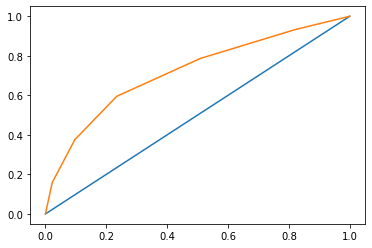

In [116]:
knn = KNeighborsClassifier()

model_eval(knn)

## 6. GradientBoostingClassifier

In [118]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()

Train dataset :

Confusion matrix:
 [[3558  573]
 [1397 2285]]
Accuracy : 0.7478561372072188
Precision : 0.7995101469559133
Recall : 0.6205866376969038
AUC score : 0.81184808336328
F1 score : 0.6987767584097859


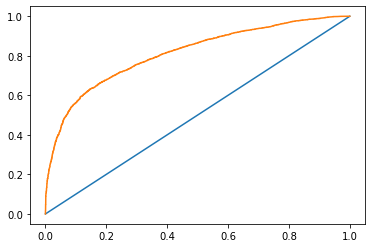



Test dataset :

Confusion matrix:
 [[1502  240]
 [ 651  956]]
Accuracy : 0.7339504329650642
Precision : 0.7993311036789298
Recall : 0.5948973242065961
AUC score : 0.7990775860775582
F1 score : 0.6821262932572244


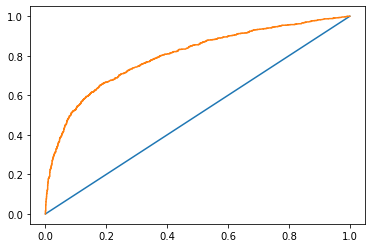

In [119]:
model_eval(gbc)

Train dataset :

Confusion matrix:
 [[3558  573]
 [1415 2267]]
Accuracy : 0.7455522846537822
Precision : 0.7982394366197183
Recall : 0.6156979902227051
AUC score : 0.8111181195005346
F1 score : 0.6951855259122969


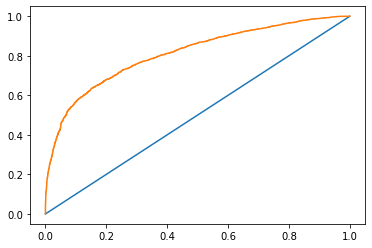



Test dataset :

Confusion matrix:
 [[1508  234]
 [ 645  962]]
Accuracy : 0.7375335921170498
Precision : 0.8043478260869565
Recall : 0.5986309894212819
AUC score : 0.7981305954074347
F1 score : 0.6864074206207635


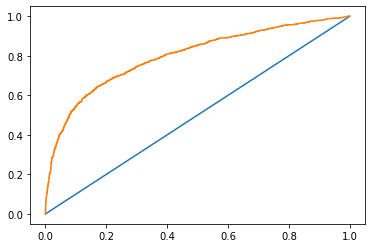

In [211]:
model_eval(gbc, X_train_sel, X_test_sel, y_train, y_test)

## ADA boost

In [122]:
from sklearn.ensemble import AdaBoostClassifier

Train dataset :

Confusion matrix:
 [[3395  736]
 [1512 2170]]
Accuracy : 0.712274414437476
Precision : 0.7467309015829319
Recall : 0.5893536121673004
AUC score : 0.7738887133504296
F1 score : 0.6587735276259867


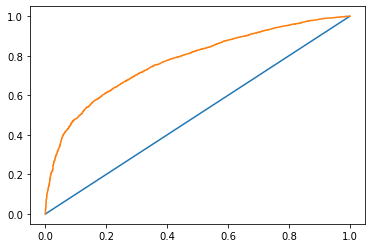



Test dataset :

Confusion matrix:
 [[1462  280]
 [ 658  949]]
Accuracy : 0.7199163929531204
Precision : 0.7721724979658259
Recall : 0.5905413814561294
AUC score : 0.780626807087534
F1 score : 0.6692524682651622


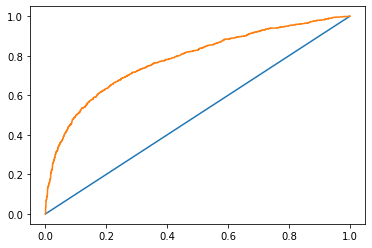

In [123]:
ada = AdaBoostClassifier()

model_eval(ada)

# GAUSSIAN NB

In [124]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

Train dataset :

Confusion matrix:
 [[3667  464]
 [2112 1570]]
Accuracy : 0.6702931012415205
Precision : 0.7718780727630286
Recall : 0.42639869636067357
AUC score : 0.731192697705285
F1 score : 0.549335199440168


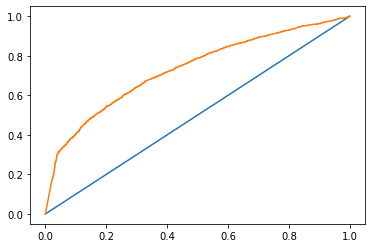



Test dataset :

Confusion matrix:
 [[1555  187]
 [ 896  711]]
Accuracy : 0.6766198865332935
Precision : 0.7917594654788419
Recall : 0.44243932794026136
AUC score : 0.7328119943101972
F1 score : 0.5676646706586826


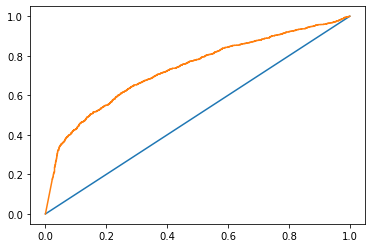

In [125]:
model_eval(nb)

In [212]:
X_train.to_csv('X_train_Bank_Marketing.csv',index=False)

In [213]:
X_test.to_csv('X_train_Bank_Marketing.csv',index=False)

# Both Random forest Classifier and Gradient Boosting gave good results